<a href="https://colab.research.google.com/github/Dragooz/Personality-and-Demographic-Traits-to-Gift-Preferences-Classifier/blob/main/Love_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from datetime import datetime
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#get correct directory
os.chdir('/content/drive/MyDrive/Love Hackathon')

In [ ]:
df = pd.read_csv('Demographic to Gift Preference Survey.csv')

In [ ]:
df.head()

,Timestamp,Sex,Birthday,Horoscope,Height (cm),Weight (kg),Body State,Relationship Status,Relationship Period (Starting Date),Hometown,Hobby (Select 3),Favourite Colour,Movie Preferences,Field of Work/ Study,Family Economy Status,How do you get your energy?,How do you see the world and gather information.,How do you make your decisions,How much do you plan ahead?,Gift Preferences (Choose 3)
0,2021/05/13 1:41:01 PM GMT+8,Male,1999-06-23,Cancer (Jun 21-Jul 22),170,72.0,Normal,Single,NaN,"Northern Region: Perlis, Kedah, Penang, Perak.",Games (board and computer games);Sports & Outd...,Blue,Action;Fantasy;Mystery;Thriller,Science,M40 (Middle 40%),I,S,T,J,Technology Gadgets;Vacation;Accompaniment (Pet...
1,2021/05/14 12:53:02 PM GMT+8,Male,2021-05-14,Pisces (Feb 19-Mar 20),175,63.0,Slim,In a Relationship,2019-04-01,"Northern Region: Perlis, Kedah, Penang, Perak.",Games (board and computer games);Sports & Outd...,Green,Comedy;Fantasy;Mystery,Science,M40 (Middle 40%),E,S,T,J,"Food and Snacks;Outfit (T-shirt, shoes, etc..)..."
2,2021/05/14 12:57:27 PM GMT+8,Male,1999-03-31,Aries (Mar 21-Apr 19),158,64.0,Slightly overweight,Single,NaN,"Northern Region: Perlis, Kedah, Penang, Perak.",Games (board and computer games);Model & Elect...,Blue,Comedy;Horror;Mystery;Thriller,Science,B40 (Bottom 40%),I,N,T,P,"Technology Gadgets;Cosmetics (Lipstick, perfum..."
3,2021/05/14 12:58:11 PM GMT+8,Female,1999-10-30,Scorpio (Oct 23-Nov 21),150,40.0,Normal,Single,NaN,"Southern Region: Negeri Sembilan, Malacca, Johor.","Arts & Crafts (embroidery, knitting, drawing);...",Blue,Action;Comedy;Drama;Fantasy;Mystery;Romance,Science,B40 (Bottom 40%),I,S,T,J,Technology Gadgets;Hand Made Gift (handmade ph...
4,2021/05/14 12:58:45 PM GMT+8,Female,1999-04-08,Aries (Mar 21-Apr 19),160,50.0,Slim,In a Relationship,2019-11-01,"Central Region: Selangor, federal territories ...","Arts & Crafts (embroidery, knitting, drawing);...",Red,Comedy;Drama;Romance,Science,M40 (Middle 40%),I,N,T,P,"Technology Gadgets;Outfit (T-shirt, shoes, etc..."


In [ ]:
def multi_cat_val_handler(df, cols_list):
  '''
  Turn single feature with multiple values into machine readable form
  cleaned = df['Hobby (Select 3)'].str.split(';', expand=True).stack()
  pd.get_dummies(cleaned, prefix='h').groupby(level=0).sum()
  '''

  for col in cols_list:
    prefix = col[0].lower() #first alphabet
    cleaned = df[col].str.split(';', expand=True).stack()
    temp_df = pd.get_dummies(cleaned, prefix=prefix).groupby(level=0).sum()
    df = df.join(temp_df)
    df.drop(col, axis=1, inplace=True)

  return df

def check_df(df, show_all=False, show_unique=False):
    null_exist =False
    for col in df.columns:
        if show_all or df[col].isna().values.sum() != 0:
            print(f'{col}: null={df[col].isna().values.sum()}, dtypes={df[col].dtypes}')
            if show_unique:
                print(f'{col}:', df[col].unique())
            if df[col].isna().values.sum() != 0:
                null_exist =True
    
    if not null_exist:
        print('No null exist in this dataframe.')

In [ ]:
#read df
df = pd.read_csv('Demographic to Gift Preference Survey.csv')

#convert to correct dtypes
df['Birthday'] = df['Birthday'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

#create necessary columns
df['Age'] = datetime.now().year - df['Birthday'].apply(lambda x: x.year)

#remove outliers
df['Age'] = df['Age'].apply(lambda x: x if (x >18 and x <60) else df['Age'].median()) #use median to impute age

#remove unnecessary columns
df = df.drop(['Timestamp', 'Birthday', 'Relationship Period (Starting Date)'], axis=1)

#rename for readability
df.rename(columns={'Hobby (Select 3)': 'Hobby', 'Gift Preferences (Choose 3)': 'Gift Preferences'}, inplace=True)

#Handle single feature with multiple values through one-hot encoding
multi_val_cols = ['Hobby', 'Movie Preferences', 'Gift Preferences']
new_df = multi_cat_val_handler(df, multi_val_cols)
new_df = pd.get_dummies(new_df, drop_first=True)

#remove weird col
new_df.drop(['g_A smile HAHAHAHA'], axis=1, inplace=True)

#remove NAN in movie - NAN means they don't like all movie 
for col in new_df.columns:
  if col.startswith('m_'):
    new_df[col] = new_df[col].fillna(0)

In [ ]:
#check NA
# new_df[(new_df.isnull().any(axis=1))]

In [ ]:
new_df.describe()

,Height (cm),Weight (kg),Age,"h_Arts & Crafts (embroidery, knitting, drawing)","h_Collecting (stamps, coins)",h_Games (board and computer games),"h_Model & Electronic (tinkering electronics, cars)",h_Music (performing or listening),"h_Performing Arts (drawing, sculpting, cooking)","h_Spiritual and Mental (meditation, self-enrichment sessions)",h_Sports & Outdoors (e-sports doesn't count),m_Action,m_Comedy,m_Drama,m_Fantasy,m_Horror,m_Mystery,m_Romance,m_Thriller,m_Western,"g_Accompaniment (Pets, etc..)",g_Cash,"g_Cosmetics (Lipstick, perfumes, etc..)",g_Fitness/ Sports Gadgets,g_Flower,g_Food and Snacks,"g_Hand Made Gift (handmade photobook, etc..)",g_I would choose all,"g_Jewelry (Necklace, Ring, etc..)","g_Outfit (T-shirt, shoes, etc..)",g_Stationery,g_Technology Gadgets,g_Vacation,Sex_Male,Horoscope_Aries (Mar 21-Apr 19),Horoscope_Cancer (Jun 21-Jul 22),Horoscope_Capricorn (Dec 22-Jan 19),Horoscope_Gemini (May 21-Jun 20),Horoscope_Leo (July 23-Aug 22),Horoscope_Libra (Sep 23-Oct 22),Horoscope_Pisces (Feb 19-Mar 20),Horoscope_Sagittarius (Nov 22-Dec 21),Horoscope_Scorpio (Oct 23-Nov 21),Horoscope_Taurus (Apr 20-May 20),Horoscope_Virgo (Aug 23-Sep 22),Body State_Fat,Body State_Muscular,Body State_Normal,Body State_Slightly overweight,Body State_Slim,Relationship Status_Married,Relationship Status_Single,"Hometown _East Coast Region: Kelantan, Terengganu, Pahang,","Hometown _East Malaysia: Sabah, Sarawak","Hometown _Northern Region: Perlis, Kedah, Penang, Perak.",Hometown _Others,"Hometown _Southern Region: Negeri Sembilan, Malacca, Johor.",Favourite Colour_Blue,Favourite Colour_Green,Favourite Colour_Indigo,Favourite Colour_Orange,Favourite Colour_Purple,Favourite Colour_Red,Favourite Colour_White,Favourite Colour_Yellow,Field of Work/ Study_Science,Family Economy Status_M40 (Middle 40%),Family Economy Status_T20 (Top 20%),How do you get your energy?_I,How do you see the world and gather information. _S,How do you make your decisions_T,How much do you plan ahead?_P
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.00000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,164.569620,56.074684,21.987342,0.341772,0.037975,0.544304,0.151899,0.759494,0.291139,0.240506,0.632911,0.531646,0.658228,0.531646,0.329114,0.240506,0.455696,0.481013,0.303797,0.177215,0.101266,0.316456,0.164557,0.177215,0.088608,0.417722,0.316456,0.012658,0.126582,0.278481,0.101266,0.493671,0.392405,0.468354,0.088608,0.139241,0.063291,0.050633,0.063291,0.037975,0.037975,0.075949,0.151899,0.139241,0.075949,0.012658,0.063291,0.670886,0.012658,0.227848,0.012658,0.759494,0.227848,0.025316,0.379747,0.012658,0.253165,0.21519,0.050633,0.025316,0.012658,0.164557,0.088608,0.189873,0.050633,0.721519,0.632911,0.050633,0.683544,0.645570,0.607595,0.518987
std,7.799874,11.080457,1.031475,0.477334,0.192356,0.501216,0.361216,0.430122,0.457190,0.430122,0.485091,0.502186,0.477334,0.502186,0.472894,0.430122,0.501216,0.502832,0.462835,0.384291,0.303608,0.468065,0.373149,0.384291,0.285992,0.496335,0.468065,0.112509,0.334629,0.451116,0.303608,0.503155,0.491406,0.502186,0.285992,0.348409,0.245042,0.220648,0.245042,0.192356,0.192356,0.266610,0.361216,0.348409,0.266610,0.112509,0.245042,0.472894,0.112509,0.422124,0.112509,0.430122,0.422124,0.158088,0.488425,0.112509,0.437603,0.41358,0.220648,0.158088,0.112509,0.373149,0.285992,0.394707,0.220648,0.451116,0.485091,0.220648,0.

In [ ]:
new_df.shape

(77, 72)

In [ ]:
new_df.head()

,Height (cm),Weight (kg),Age,"h_Arts & Crafts (embroidery, knitting, drawing)","h_Collecting (stamps, coins)",h_Games (board and computer games),"h_Model & Electronic (tinkering electronics, cars)",h_Music (performing or listening),"h_Performing Arts (drawing, sculpting, cooking)","h_Spiritual and Mental (meditation, self-enrichment sessions)",h_Sports & Outdoors (e-sports doesn't count),m_Action,m_Comedy,m_Drama,m_Fantasy,m_Horror,m_Mystery,m_Romance,m_Thriller,m_Western,"g_Accompaniment (Pets, etc..)",g_Cash,"g_Cosmetics (Lipstick, perfumes, etc..)",g_Fitness/ Sports Gadgets,g_Flower,g_Food and Snacks,"g_Hand Made Gift (handmade photobook, etc..)",g_I would choose all,"g_Jewelry (Necklace, Ring, etc..)","g_Outfit (T-shirt, shoes, etc..)",g_Stationery,g_Technology Gadgets,g_Vacation,Sex_Male,Horoscope_Aries (Mar 21-Apr 19),Horoscope_Cancer (Jun 21-Jul 22),Horoscope_Capricorn (Dec 22-Jan 19),Horoscope_Gemini (May 21-Jun 20),Horoscope_Leo (July 23-Aug 22),Horoscope_Libra (Sep 23-Oct 22),Horoscope_Pisces (Feb 19-Mar 20),Horoscope_Sagittarius (Nov 22-Dec 21),Horoscope_Scorpio (Oct 23-Nov 21),Horoscope_Taurus (Apr 20-May 20),Horoscope_Virgo (Aug 23-Sep 22),Body State_Fat,Body State_Muscular,Body State_Normal,Body State_Slightly overweight,Body State_Slim,Relationship Status_Married,Relationship Status_Single,"Hometown _East Coast Region: Kelantan, Terengganu, Pahang,","Hometown _East Malaysia: Sabah, Sarawak","Hometown _Northern Region: Perlis, Kedah, Penang, Perak.",Hometown _Others,"Hometown _Southern Region: Negeri Sembilan, Malacca, Johor.",Favourite Colour_Blue,Favourite Colour_Green,Favourite Colour_Indigo,Favourite Colour_Orange,Favourite Colour_Purple,Favourite Colour_Red,Favourite Colour_White,Favourite Colour_Yellow,Field of Work/ Study_Science,Family Economy Status_M40 (Middle 40%),Family Economy Status_T20 (Top 20%),How do you get your energy?_I,How do you see the world and gather information. _S,How do you make your decisions_T,How much do you plan ahead?_P
0,170,72.0,22.0,0,0,1,0,0,1,0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0
1,175,63.0,22.0,0,0,1,0,1,0,0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0
2,158,64.0,22.0,0,0,1,1,1,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1
3,150,40.0,22.0,1,0,0,0,1,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0
4,160,50.0,22.0,1,0,1,1,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1


In [ ]:
check_df(new_df, show_unique=True)

No null exist in this dataframe.


Text(0, 0.5, 'Participants')

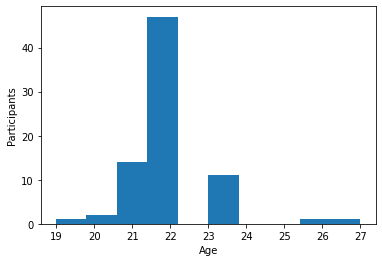

In [ ]:
plt.hist(new_df['Age'])
plt.xlabel('Age')
plt.ylabel('Participants')

# Train & Test Datasets

In [ ]:
y = new_df.iloc[:, 20:32]
X = new_df.drop(y.columns, axis=1)

from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

best score: 0.7325582017306508, with k=26


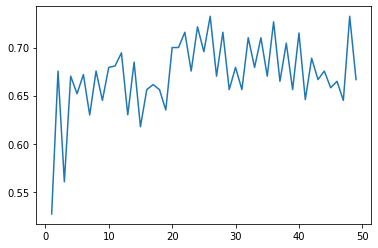

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_list = range(1,50)
max_score = best_kn = 0
score = []
for kn in kn_list:

  neigh = KNeighborsClassifier(n_neighbors=kn)
  neigh.fit(X_train, y_train)

  y_pred = neigh.predict(X_test)
  y_true = y_test.to_numpy()
  test_score = alpha_evaluation_score(y_true, y_pred)
  score.append(test_score)

  if test_score > max_score:
    max_score = test_score
    best_kn = kn

# print(neigh.predict([[1.1]]))
# print(neigh.predict_proba([[0.9]]))
plt.plot(kn_list, score)
print(f'best score: {max_score}, with k={best_kn}')

In [ ]:
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=26)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
y_true = y_test.to_numpy()

confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

ValueError: ignored

In [ ]:
#evaluation
'''
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
'''

def alpha_evaluation_score(y_true, y_pred):
    alpha = 1
    beta = 0.25
    gamma = 1
    
    # compute true positives across training examples and labels
    tp = np.sum(np.logical_and(y_true, y_pred))
    
    # compute false negatives (Missed Labels) across training examples and labels
    fn = np.sum(np.logical_and(y_true, np.logical_not(y_pred)))
    
    # compute False Positive across training examples and labels.
    fp = np.sum(np.logical_and(np.logical_not(y_true), y_pred))
        
    # Compute alpha evaluation score
    alpha_score = (1 - ((beta * fn + gamma * fp ) / (tp +fn + fp + 0.00001)))**alpha 
    
    return alpha_score

from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)
# accuracy_score(y_true, y_pred, normalize=False)

0.0

In [ ]:
alpha_evaluation_score(y_true, y_pred)

0.6666667361110967

In [ ]:
y_true

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)